In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/home/kmit/Downloads/images/cloud_log.jpeg',0)

In [ ]:
# Apply Gaussian Blur
blur = cv2.GaussianBlur(img,(3,3),0)

In [ ]:
# Apply Laplacian operator in some higher datatype
laplacian = cv2.Laplacian(blur,cv2.CV_64F)

In [ ]:
# But this tends to localize the edge towards the brighter side.
laplacian1 = laplacian/laplacian.max()
 
#cv2.imshow('a7',laplacian1)
#cv2.waitKey(0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(laplacian1),plt.title('sharpen')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
cv2.imshow('a7',laplacian1)
cv2.waitKey(0)

In [ ]:
cv2.destroyAllWindows() 

In [ ]:
pip install scikit-image --user 

In [ ]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter
from skimage import img_as_float


def _unsharp_mask_single_channel(image, radius, amount, vrange):
    """Single channel implementation of the unsharp masking filter."""

    blurred = gaussian_filter(image,
                              sigma=radius,
                              mode='reflect')

    result = image + (image - blurred) * amount
    if vrange is not None:
        return np.clip(result, vrange[0], vrange[1], out=result)
    return result

In [ ]:
blurred1 = gaussian_filter(img,sigma=1,mode='reflect')

In [ ]:
img2=_unsharp_mask_single_channel(img,radius=1, amount=1,vrange=None)

In [ ]:
plt.subplot(121),plt.imshow(blurred1),plt.title('blurred')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2),plt.title('sharpen')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
def unsharp_mask(image, radius=1.0, amount=1.0, multichannel=False,preserve_range=False):
    vrange = None  # Range for valid values; used for clipping.
    if preserve_range:
        fimg = image.astype(np.float)
    else:
        fimg = img_as_float(image)
        negative = np.any(fimg < 0)
        if negative:
            vrange = [-1., 1.]
        else:
            vrange = [0., 1.]

    if multichannel:
        result = np.empty_like(fimg, dtype=np.float)
        for channel in range(image.shape[-1]):
            result[..., channel] = _unsharp_mask_single_channel(
                fimg[..., channel], radius, amount, vrange)
        return result
    else:
        return _unsharp_mask_single_channel(fimg, radius, amount, vrange)         
    

In [ ]:
img3=unsharp_mask(img2,radius=1.0, amount=1.0, multichannel=False,preserve_range=False)

In [ ]:
plt.subplot(121),plt.imshow(img2),plt.title('sharpen')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img3),plt.title('un-sharpen')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
from skimage import data
from skimage.filters import unsharp_mask
import matplotlib.pyplot as plt

image = data.moon()
result_1 = unsharp_mask(image, radius=1, amount=1)
result_2 = unsharp_mask(image, radius=5, amount=2)
result_3 = unsharp_mask(image, radius=20, amount=1)

fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

In [ ]:
import cv2
img_pyr = cv2.imread('/home/kmit/Downloads/images/child_pyramid.jpeg')
img_level_1 = cv2.pyrDown(img_pyr)
img_level_2 = cv2.pyrDown(img_level_1)

In [ ]:
import cv2
# Load the image
img = cv2.imread('/home/kmit/Downloads/images/child_pyramid.jpeg')
lower = img.copy()

# Create a Gaussian Pyramid
gaussian_pyr = [lower]
for i in range(3):
    lower = cv2.pyrDown(lower)
    gaussian_pyr.append(lower)

# Last level of Gaussian remains same in Laplacian
laplacian_top = gaussian_pyr[-1]

# Create a Laplacian Pyramid
laplacian_pyr = [laplacian_top]
for i in range(3,0,-1):
    size = (gaussian_pyr[i - 1].shape[1], gaussian_pyr[i - 1].shape[0])
    gaussian_expanded = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
    laplacian = cv2.subtract(gaussian_pyr[i-1], gaussian_expanded)
    laplacian_pyr.append(laplacian)
    cv2.imshow('lap-{}'.format(i-1),laplacian)
    cv2.waitKey(0)

In [ ]:
cv2.destroyAllWindows() 

In [5]:
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector

In [7]:
import numpy as np
import numpy.fft as fp
import matplotlib.pyplot as plt

In [15]:
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.color import rgb2gray
from skimage.io import imread
import scipy.fftpack as fp

In [19]:

import numpy as np
from matplotlib import pyplot as plt

im = np.mean(imread('/home/kmit/Downloads/images/lena_rgb.jpeg'), axis=2)
# create the motion blur kernel
size = 21
kernel = np.zeros((size, size))
kernel[int((size-1)/2), :] = np.ones(size)
kernel = kernel / size
kernel = np.pad(kernel, (((im.shape[0]-size)//2,(im.shape[0]-size)//2+1), ((im.shape[1]-size)//2,(im.shape[1]-size)//2+1)), padwithzeros)
 
freq = fp.fft2(im)
freq_kernel = fp.fft2(fp.ifftshift(kernel))
convolved1 = freq*freq_kernel
im_blur = fp.ifft2(convolved1).real
im_blur = im_blur / np.max(im_blur)
 
epsilon = 10**-6
 
freq = fp.fft2(im_blur)
freq_kernel = (1 / (epsilon + freq_kernel1))-1
 
convolved = freq*freq_kernel
im_restored = fp.ifft2(convolved).real
im_restored = im_restored / np.max(im_restored)
 
plt.figure(figsize=(18,12))
plt.subplot(221)
plt.imshow(im)
plt.title('Original image', size=20)
plt.axis('off')
plt.subplot(222)
plt.imshow(im_blur)
plt.title('Blurred image with motion blur kernel', size=20)
plt.axis('off')
plt.subplot(223)
plt.imshow(im_restored)
plt.title('Restored image with inverse filter', size=20)
plt.axis('off')
plt.subplot(224)
plt.imshow(im_restored - im)
plt.title('Diff restored &amp;amp;amp;amp;amp;amp; original image', size=20)
plt.axis('off')
plt.show()
 
# Plot the surface of the frequency responses here

ValueError: operands could not be broadcast together with shapes (225,225) (226,226) 

(225, 225) (450, 450)


/home/kmit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
/home/kmit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
/home/kmit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
/home/kmit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:46: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0.5, 1.0, 'Output Image')

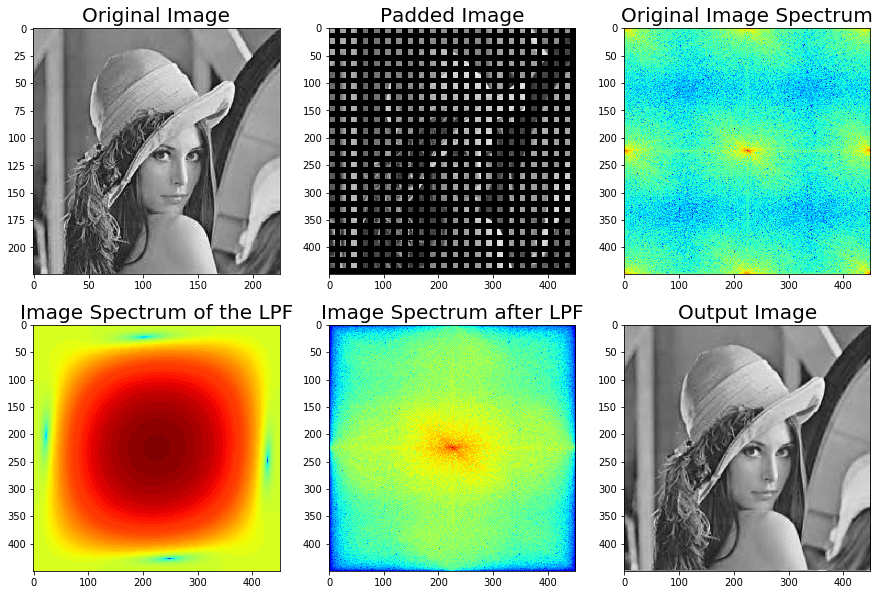

In [17]:
import numpy as np
import numpy.fft as fp
import matplotlib.pyplot as plt
im = np.mean(imread('/home/kmit/Downloads/images/lena_rgb.jpeg'), axis=2)
im1 = np.zeros((2*im.shape[0], 2*im.shape[1]))
print(im.shape, im1.shape)
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im1[2*i,2*j] = im[i,j]
 
def padwithzeros(vector, pad_width, iaxis, kwargs):
    vector[:pad_width[0]] = 0
    vector[-pad_width[1]:] = 0
    return vector
 
# the LPF kernel
kernel = [[0.25, 0.5, 0.25], [0.5, 1, 0.5], [0.25, 0.5, 0.25]]
# enlarge the kernel to the shape of the image
kernel = np.pad(kernel, (((im1.shape[0]-3)//2,(im1.shape[0]-3)//2+1), ((im1.shape[1]-3)//2,(im1.shape[1]-3)//2+1)), padwithzeros) 
 
plt.figure(figsize=(15,10))
plt.gray() # show the filtered result in grayscale
 
freq = fp.fft2(im1)
freq_kernel = fp.fft2(fp.ifftshift(kernel))
freq_LPF = freq*freq_kernel # by the Convolution theorem
im2 = fp.ifft2(freq_LPF)
freq_im2 = fp.fft2(im2)
 
plt.subplot(2,3,1)
plt.imshow(im)
plt.title('Original Image', size=20)
plt.subplot(2,3,2)
plt.imshow(im1)
plt.title('Padded Image', size=20)
plt.subplot(2,3,3)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq))).astype(int), cmap='jet')
plt.title('Original Image Spectrum', size=20)
plt.subplot(2,3,4)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_kernel))).astype(int), cmap='jet')
plt.title('Image Spectrum of the LPF', size=20)
plt.subplot(2,3,5)
plt.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_im2))).astype(int), cmap='jet')
plt.title('Image Spectrum after LPF', size=20)
plt.subplot(2,3,6)
plt.imshow(im2.astype(np.uint8)) # the imaginary part is an artifact
plt.title('Output Image', size=20)